### Import data

In [1]:
# import modules and pakages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
cases = pd.read_csv('/Users/Sophie9w9/Desktop/COVID19_clean_shiqi.csv')


In [3]:
# delete NaN value
cases = cases[cases['ID'].notnull()]
cases

,ID,age,sex,city,province,country,latitude,longitude,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,outcome,date_death_or_discharge,location
0,1.0,30.0,male,"Chaohu City, Hefei City",Anhui,China,31.646960,117.716600,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,NaN
1,2.0,47.0,male,"Baohe District, Hefei City",Anhui,China,31.778630,117.331900,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,NaN
2,3.0,49.0,male,"High-Tech Zone, Hefei City",Anhui,China,31.828313,117.224844,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,High-Tech Zone
3,4.0,47.0,female,"High-Tech Zone, Hefei City",Anhui,China,31.828313,117.224844,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,High-Tech Zone
4,5.0,50.0,female,"Feidong County, Hefei City",Anhui,China,32.001230,117.568100,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13169,13475.0,61.0,male,Nagoya City,Aichi Prefecture,Japan,NaN,NaN,27.02.2020,NaN,28.02.2020,"cough, fever",NaN,NaN,#207,NaN,NaN,NaN,NaN,NaN
13170,13476.0,41.0,female,NaN,Osaka,Japan,NaN,NaN,19.02.2020,NaN,28.02.2020,"cough, fever",NaN,NaN,#208,NaN,NaN,NaN,NaN,NaN
13171,13477.0,1.0,female,NaN,Osaka,Japan,NaN,NaN,NaN,NaN,28.02.2020,NaN,NaN,NaN,#209,NaN,NaN,NaN,NaN,NaN
13172,13478.0,NaN,female,Amsterdam,NaN,Netherlands,NaN,NaN,NaN,NaN,28.02.2020,mild,NaN,NaN,returned from Italy this week,NaN,works at Amsterdam UMC Hospital,NaN,NaN,NaN


### Hypothesis 1: People live in Wuhan are more likely to have the disease.

In [4]:
# delete null value
cases1 =cases[cases['lives_in_Wuhan'].notnull()]

In [5]:
Live_in_Wuhan = cases1["ID"].groupby([cases1["lives_in_Wuhan"]]).count()
Live_in_Wuhan

lives_in_Wuhan
no     346
yes    219
Name: ID, dtype: int64

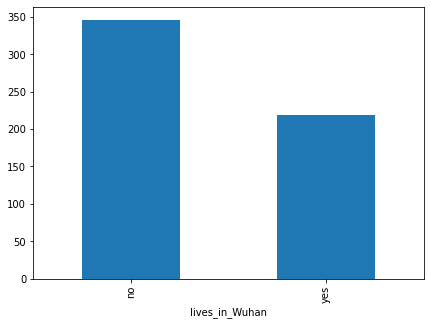

In [6]:
Live_in_Wuhan.plot(x = 'live in Wuhan', y = 'number of cases', figsize = (7, 5), kind = "bar")

### Hypothesis 2: The confirmed cases have common attributes.

In [7]:
# delete null value
cases2 = cases[cases['symptoms'].notnull()]
symptoms = cases2["ID"].groupby([cases2["symptoms"]]).count().reset_index(name="count")

In [8]:
symptoms.sort_values(by = ['count'], ascending = False)

,symptoms,count
100,fever,145
50,"cough, fever",81
157,pneumonitis,19
38,cough,15
132,"fever, sore throat",9
...,...,...
60,"cough, fever, pneumonia",1
61,"cough, fever, pneumonia, respiratory distress",1
65,"cough, fever, soreness",1
67,"cough, fever, weakness",1


### Hypothesis 3: Olders are more likely to have the disease

In [9]:
# delete null value
cases3 = cases[cases['age'].notnull()]

In [10]:
cases3 = cases3[['ID', 'age']]

In [11]:
cases3['age'] = cases3['age'].apply(pd.to_numeric)

In [12]:
def set_index(x):
    if x <= 10:
        return "1 - 10"
    elif x > 10 and x <= 20:
        return "11 - 20"
    elif x > 20 and x <= 30:
        return "21 - 30"
    elif x > 30 and x <= 40:
        return "31 - 40"
    elif x > 40 and x <= 50:
        return "41 - 50"
    elif x > 50 and x <= 60:
        return "51 - 60"
    elif x > 60 and x <= 70:
        return "61 - 70"
    elif x > 70 and x <= 80:
        return "71 - 80"
    elif x > 80 and x <= 90:
        return "81 - 90"
    elif x > 90 and x <= 100:
        return "91 - 100"
    else:
        return "0"

In [13]:
cases3.loc[:, 'age_round'] = cases3['age'].apply(set_index)
cases3

,ID,age,age_round
0,1.0,30.0,21 - 30
1,2.0,47.0,41 - 50
2,3.0,49.0,41 - 50
3,4.0,47.0,41 - 50
4,5.0,50.0,41 - 50
...,...,...,...
13167,13473.0,61.0,61 - 70
13168,13474.0,51.0,51 - 60
13169,13475.0,61.0,61 - 70
13170,13476.0,41.0,41 - 50


In [14]:
age = cases3["ID"].groupby([cases3["age_round"]]).count().reset_index(name="count")
age

,age_round,count
0,1 - 10,42
1,11 - 20,34
2,21 - 30,183
3,31 - 40,236
4,41 - 50,245
5,51 - 60,212
6,61 - 70,159
7,71 - 80,69
8,81 - 90,23
9,91 - 100,2


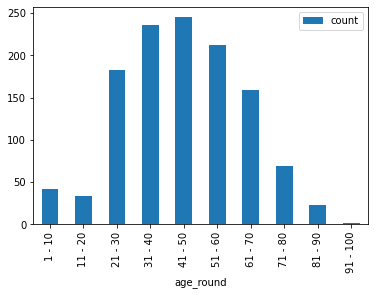

In [15]:
age.plot(x = "age_round", y = "count", kind = "bar")